## Carga de datos

En este notebook vamos a trabajar con un set de datos acerca de la situación laboral y salarios en distintos ámbitos de Data Science. 

La idea es, en primer lugar, preprocesar los datos, para dejarlos limpios y en un formato compatible con las posteriores acciones. Después, se plantean unas preguntas, que se responderán de manera numerica (usando NumPy y Pandas) y de manera gráfica (usando MatPlotlib, Seaborn y Plotly).


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'datos\ds_salaries.csv')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Miro las columnas, el tipo de datos, presencia de nulos, duplicados,... Para hacerme una idea de que datos tengo

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1171)

## Preprocesamiento

En este caso, habria que evaluar si los duplicados son relevantes o son fallos de introduccion de datos

In [9]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


En este caso, hemos decidido eliminar los duplicados, ya que no aportan informacion adicional y pueden afectar al analisis


In [10]:
[~df.duplicated()]  #Hay dos maneras para hacerlo
df.drop_duplicates(inplace=True)


In [11]:
df.shape

(2584, 11)

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Análisis de datos exploratorio (EDA)

Uno de las variables más importantes en este Dataset, y sobre la cual tratan muchas de las siguientes preguntas es el sueldo. Por ello, vamos a observar esta variable un poco mas en detalle, y a eliminar posibles artefactos que influyan en el análisis. Tendremos en cuenta la variable 'salary_in_usd', para eliminar cualquier variabilidad debido a las distintas divisas que pueden haber.

Para ello lo primero que haremos sera representar con un histograma esta variable y así observar su distribución.

<Axes: >

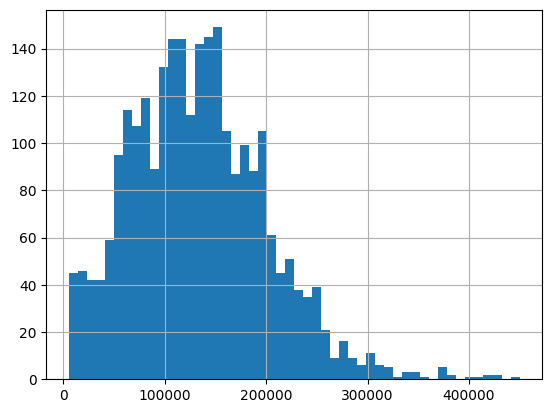

In [13]:
df['salary_in_usd'].hist(bins=50)

Se observa que hay varios valores muy altos que se alejan del resto de valores. Por ello, vamos a usar el rango intercuartilico para eliminar estos posibles outliers.

Calculamos el rango intercuartílico (Desde Q25 a Q75), y cogemos 1.5 veces el rango por encima de Q75 y por debajo de Q25. Este será el rango de los valores que cogemos. Los que queden fuera se quitan del dataset. 

In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [15]:
df_clean_salary = remove_outliers(df, 'salary_in_usd')

<Axes: >

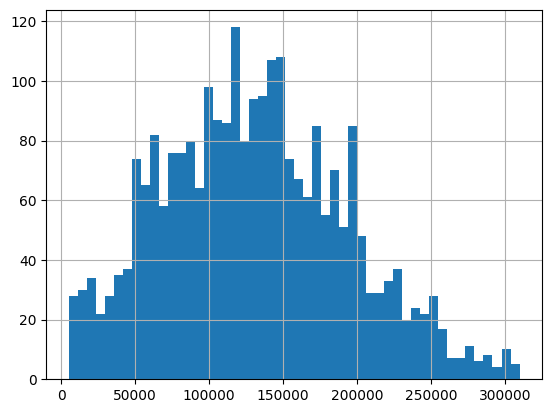

In [16]:
df_clean_salary['salary_in_usd'].hist(bins=50)


Ahora se puede observar como la distribución de los datos se aproxima más a una distribución normal. 

In [17]:
df = df_clean_salary

### ¿Cuál es el tipo de empleo que gana mas dinero?

In [18]:
#Agrego los trabajos por tipo de empleo y calculo la media del salario
df[['job_title', 'salary_in_usd']].groupby('job_title').agg('mean').round(2).sort_values(by='salary_in_usd', ascending=False)

,salary_in_usd
job_title,
Cloud Data Architect,250000.00
Data Lead,212500.00
Principal Data Engineer,192500.00
Principal Machine Learning Engineer,190000.00
Applied Scientist,185020.67
...,...
3D Computer Vision Researcher,21352.25
Data Analytics Lead,17509.00
Staff Data Analyst,15000.00


In [19]:
#Hacemos un dataframe que recoja los 10 empleados mejor pagados, para luego representarlos

top_10 = df[['job_title', 'salary_in_usd']].groupby('job_title').agg('mean').round(2).sort_values(by='salary_in_usd', ascending=False).head(10)

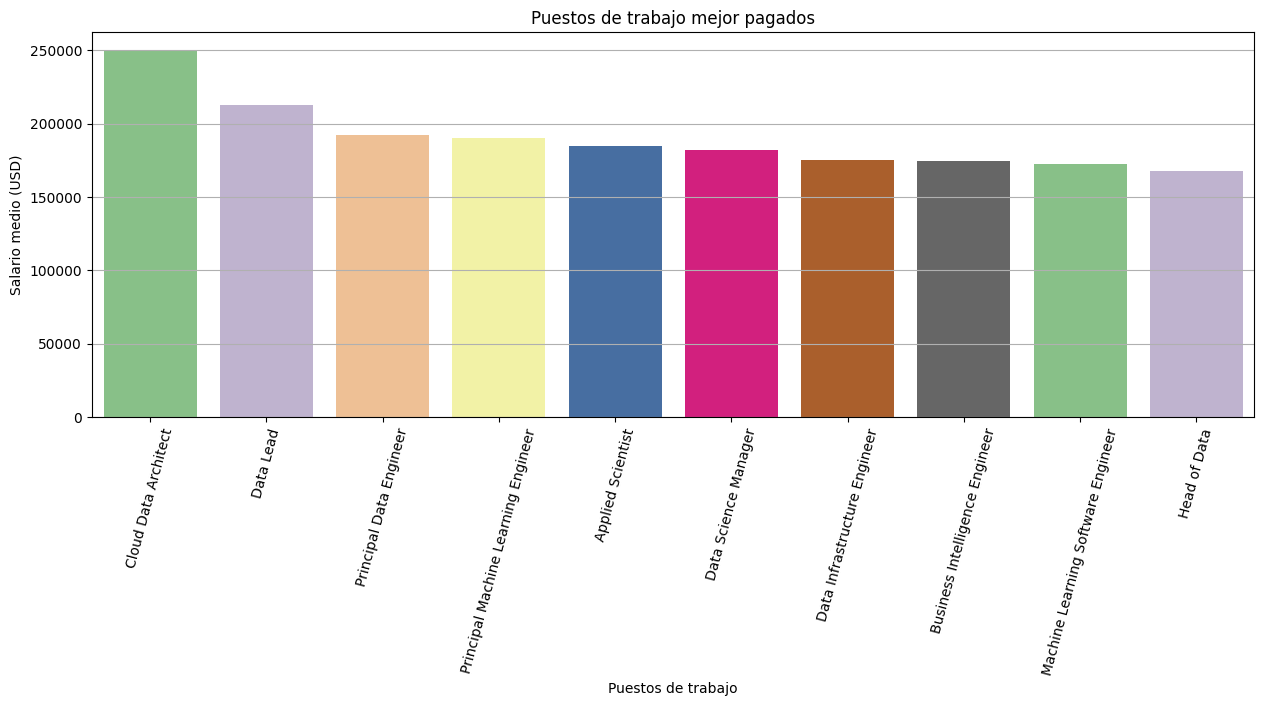

In [20]:
#Grafico plano

plt.figure(figsize=(15,5))

sns.barplot(x = 'job_title', y='salary_in_usd', 
            data = top_10, 
            palette = 'Accent', hue = 'job_title')

plt.xlabel('Puestos de trabajo')
plt.ylabel('Salario medio (USD)')
plt.xticks(rotation=75)
plt.grid(visible = True, which='both', axis = 'y')
plt.title('Puestos de trabajo mejor pagados')
plt.show()

In [21]:
#Grafico interactivo
#convertimos los tipos de trabajo en una columna
top_10.reset_index(inplace=True)

fig = px.bar(top_10, x = 'job_title', y = 'salary_in_usd')
fig.update_layout(
    title={
        'text': "Puestos de trabajo mejor pagados",
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclarlo al centro
    },
    yaxis_title='Salario medio (USD)',
    xaxis_title='Puesto de trabajo'
)


fig.show()


### ¿Dónde están localizadas las compañias que mas pagan?

En este caso, lo que podemos hacer es un grafico que represente el salario medio por país, junto con el numero de empleos en ese país, para poner en contexto los datos.


In [22]:
#Calculamos el nº de compañias por pais
df_counts = pd.DataFrame(df['company_location'].groupby(df['company_location']).agg('count').sort_values(ascending=False))
df_counts.rename(columns={'company_location': 'Job count'}, inplace=True)

#Calculo la media de salario por pais
df_location_pay = df[['company_location', 'salary_in_usd']].groupby('company_location').agg('mean').round(2).sort_values(by='salary_in_usd', ascending=False)

#Junto ambos DFs
df_plot = pd.concat([ pd.DataFrame(df_counts), df_location_pay], join='inner', axis=1)
df_plot.reset_index(inplace=True)

In [23]:
#Construimos el grafico
fig = px.scatter(df_plot, x="Job count", y="salary_in_usd", color="salary_in_usd",  size="Job count",
                hover_data=['company_location'], log_x=True, size_max=60) 


fig.update_layout(
    title={
        'text': "Distribución del salario por paises",
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclarlo al centro
    },
    yaxis_title='Salario medio (USD)',
    xaxis_title='Total de trabadores'
)
fig.show()

### ¿Cuál es el tipo de empleo que permite mas trabajo remoto?

In [24]:
#Quedarse con los puestos de trabajo con al menos 10 instancias
job_counts = df['job_title'].groupby(df['job_title']).transform('count')

df_job10 = df[job_counts >= 10]


In [25]:
#Calculo el porcentaje de trabajo remoto para cada empleo, y el numero de empleados en ese puesto
df_remote = df_job10[['job_title', 'remote_ratio']].groupby('job_title').agg('mean')
df_count = df_job10[['job_title', 'remote_ratio']].groupby('job_title').agg('count').rename(columns={'remote_ratio':'job_count'})
df_join = pd.merge(df_remote, df_count, how='inner', on= 'job_title').sort_values(by='remote_ratio', ascending=False)
df_join.sort_values(by='job_count', ascending=False).head()

,remote_ratio,job_count
job_title,,
Data Engineer,49.244966,596
Data Scientist,48.127341,534
Data Analyst,51.269036,394
Machine Learning Engineer,48.275862,203
Analytics Engineer,56.043956,91


In [26]:
#Aqui calculo, para cada puesto, cuantos trabajan 100% remoto, cuantos 50% y cuantos 0%
df_100= df[['job_title' , 'remote_ratio']][df['remote_ratio'] == 100]
df_50= df[['job_title' , 'remote_ratio']][df['remote_ratio'] == 50]
df_0= df[['job_title' , 'remote_ratio']][df['remote_ratio'] == 0]

df_100 =df_100.groupby('job_title').agg('count').rename(columns={'remote_ratio':'100_remote'})
df_50 =df_50.groupby('job_title').agg('count').rename(columns={'remote_ratio':'50_remote'})
df_0 = df_0.groupby('job_title').agg('count').rename(columns={'remote_ratio':'0_remote'})

df_remote = pd.merge(df_100, df_50, how = 'inner', on='job_title')
df_remote = pd.merge(df_remote, df_0, how = 'inner', on='job_title')


In [27]:
#Por ultimo, saco el porcentaje de trabajadores que tienen 100, 50 y 0% de remoto respectivamente
df_all = pd.merge(df_join, df_remote, how='inner', on='job_title')

df_all['100_remote'] = (df_all['100_remote'] /df_all['job_count'] *100).round(2)
df_all['50_remote'] = (df_all['50_remote'] /df_all['job_count'] *100).round(2)
df_all['0_remote'] = (df_all['0_remote'] /df_all['job_count'] *100).round(2)

df_all.sort_values(by='job_count', ascending=False).head()


,remote_ratio,job_count,100_remote,50_remote,0_remote
job_title,,,,,
Data Engineer,49.244966,596,47.82,2.85,49.33
Data Scientist,48.127341,534,44.01,8.24,47.75
Data Analyst,51.269036,394,49.24,4.06,46.70
Machine Learning Engineer,48.275862,203,43.84,8.87,47.29
Analytics Engineer,56.043956,91,54.95,2.20,42.86


Para representar estos datos hacemos un grafico de barras apiladas que muestra, para cada puesto de trabajo, el porcentage de trabajadores que tiene cada modo de trabajo remoto (0%, 50%, 100%). 

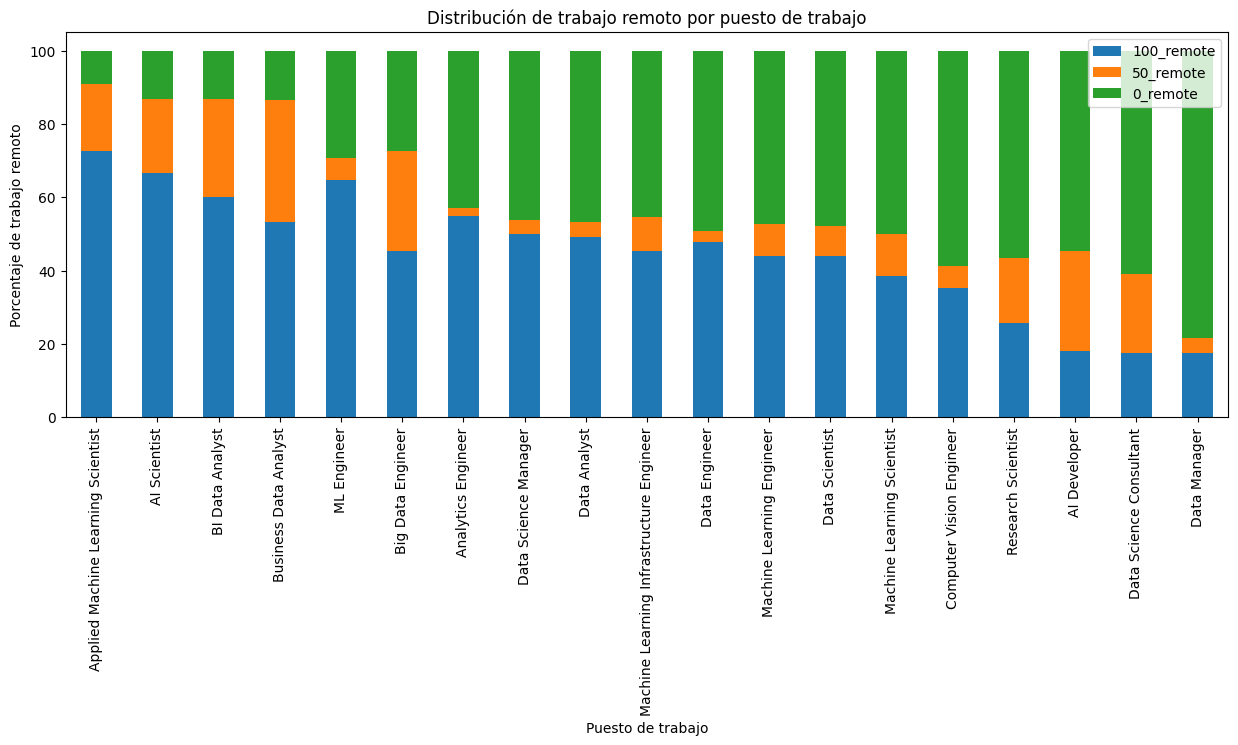

In [28]:

# Crear un gráfico de barras apiladas
df_all[['100_remote', '50_remote', '0_remote']].plot(kind='bar', stacked=True, figsize=(15, 5))

plt.xlabel('Puesto de trabajo')
plt.ylabel('Porcentaje de trabajo remoto')
plt.title('Distribución de trabajo remoto por puesto de trabajo')
plt.xticks(rotation=90)
plt.show()

In [29]:
#Grafico interactivo

# Crear las trazas para cada categoría (100% remoto, 50% remoto y 0% remoto)
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_all.index,
    y=df_all['100_remote'],
    name='100% remoto',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df_all.index,
    y=df_all['50_remote'],
    name='50% remoto',
    marker_color='orange'
))

fig.add_trace(go.Bar(
    x=df_all.index,
    y=df_all['0_remote'],
    name='0% remoto',
    marker_color='green'
))

# Hacer que las barras estén apiladas
fig.update_layout(barmode='stack')



# Añadir etiquetas y título
fig.update_layout(
    title={
        'text': "Distribución de trabajo remoto por puesto de trabajo",
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclarlo al centro
    },
    xaxis_title='Puesto de trabajo',
    yaxis_title='Porcentaje de trabajo remoto',
    xaxis_tickangle=-90,  # Rotar etiquetas del eje X
    height=600,
    width=1000
)

# Mostrar el gráfico
fig.show()

### ¿Cuál es el salario promedio de los empleados de Data Scientist?

In [30]:
df[['job_title', 'salary_in_usd']].groupby('job_title').agg('mean').loc['Data Scientist']

salary_in_usd    131257.037453
Name: Data Scientist, dtype: float64

Para representar el salario medio de los data scientist, podemos hacer un boxplot

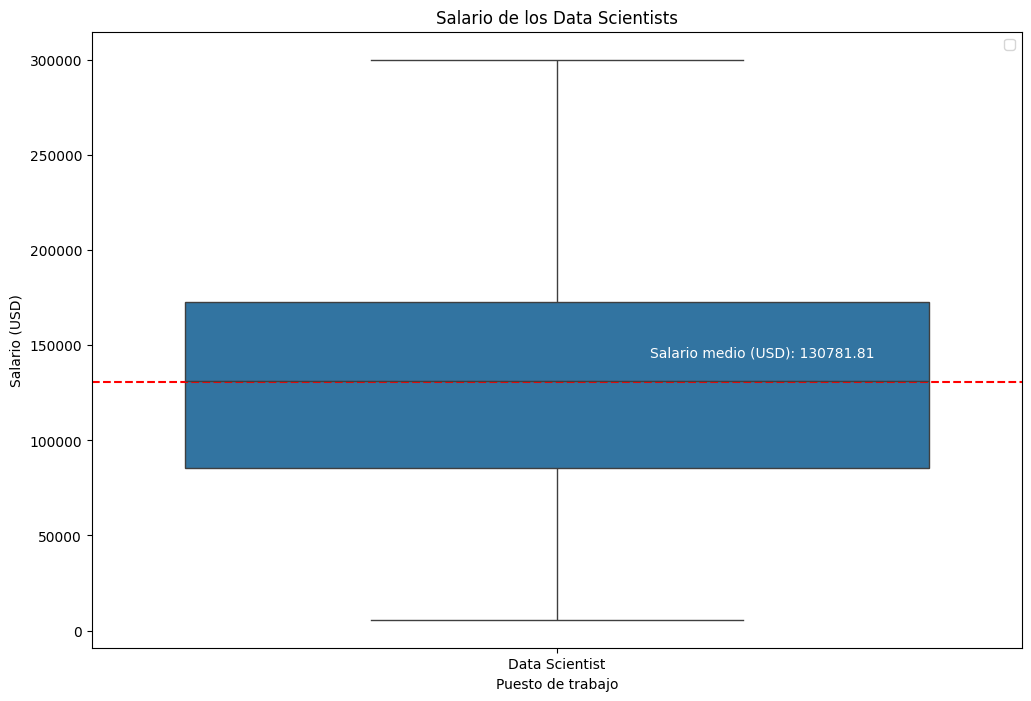

In [31]:
#Grafico plano

#Se crea la figura
plt.figure(figsize=(12, 8))

df_DS = df[df['job_title'] == 'Data Scientist']
#Se construye el boxplot
sns.boxplot(x = 'job_title', y = 'salary_in_usd', data = df_DS)

#Se añade una line que marque el salario medio
mean_salary = df['salary_in_usd'].mean()
plt.axhline(mean_salary, color = 'red', linestyle= '--')

plt.text(x=0.1,  # Posición en el eje x (puedes ajustar esto según tu gráfico)
         y=mean_salary + (0.1*mean_salary),  # Posición en el eje y (ligeramente por encima de la línea)
         s=f'Salario medio (USD): {mean_salary:.2f}',  # Texto que mostrará el valor de la media
         color='white')

#Titulo y ejes
plt.title('Salario de los Data Scientists')
plt.xlabel('Puesto de trabajo')
plt.ylabel('Salario (USD)')
plt.legend()
plt.show()

In [32]:
#Grafico interactivo

fig = px.box(df_DS, x = 'job_title', y = 'salary_in_usd', title = 'Salario de los Data Scientist')
fig.update_layout(
    yaxis_title='Puesto de trabajo',
    xaxis_title='Salario (USD)'
)
fig.show()

### ¿Cuántas personas ganan por encima de los 200ks?

In [33]:
len(df[df['salary_in_usd'] > 200000])  ##Cuando miramos salario, hay que tener en cuenta la divisa, asi que mejor mirar salary_in_usd

347

Para represantar esto graficamente, lo que haremos será un grafico de cuentas que represente los trabajadores con un sueldo mayor a 200k, repartidos en los distintos puestos de trabajo

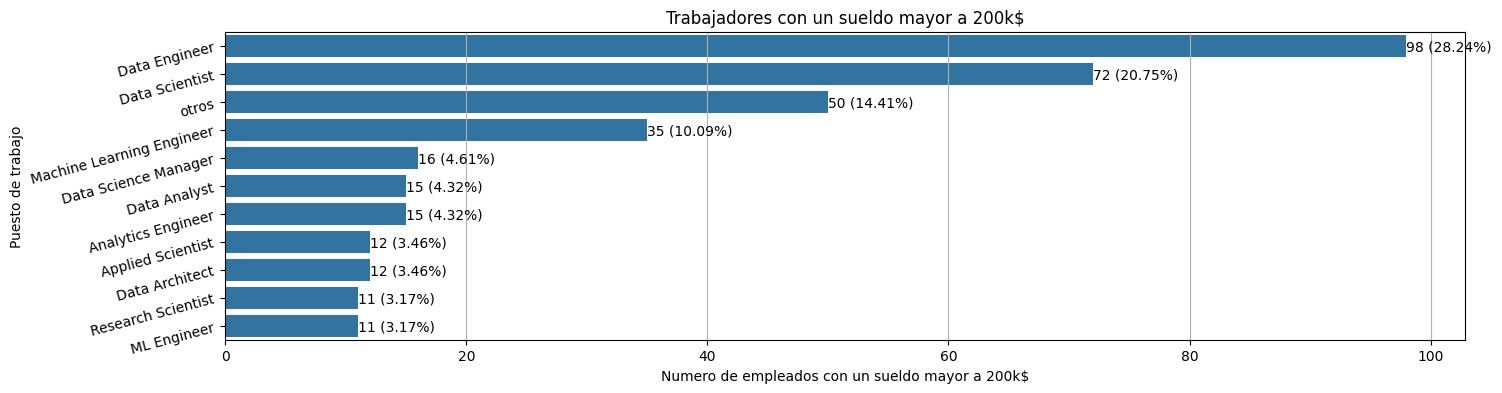

In [34]:
#Cogemos los empleos mas comunes entre la gente que cobra mas de 200k
df_200k = df[df['salary_in_usd'] > 200000]['job_title'].value_counts().head(10)


#Cambiamos el DF original para que los titulos de empleo que no estan entre los 10 primeros sean a partir de ahora 'otros'
df['job_title_top10'] = df['job_title'].apply(lambda x: x if x in df_200k else 'otros')
df['job_title_top10']

#Calculamos el numero de trabajadores que superan los 200k para cada uno de los empleos
job_title_counts = df[df['salary_in_usd'] > 200_000]['job_title_top10'].value_counts()

#Sacamos el porcentaje en funcion del tipo de empleo
total_count = job_title_counts.sum()
job_perc= (job_title_counts / total_count * 100).round(2)

#Construimos el grafico
plt.figure(figsize=(16,4))

sns.countplot(data = df[df['salary_in_usd']>200000], y = 'job_title_top10', order= job_title_counts.index)
for i, count in enumerate(job_title_counts):
    plt.text(count, i, f'{count} ({job_perc[i]}%)', va='center_baseline', color = 'black')

plt.grid(visible = True, which='both', axis = 'x')
plt.xlabel('Numero de empleados con un sueldo mayor a 200k$')
plt.ylabel('Puesto de trabajo')
plt.yticks(rotation = 15)

plt.title('Trabajadores con un sueldo mayor a 200k$')
plt.show()

In [35]:

# Construir el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir barras
fig.add_trace(go.Bar(
    y=job_title_counts.index,
    x=job_title_counts.values,
    orientation='h',  # Barras horizontales
    text=[f'{count} ({perc}%)' for count, perc in zip(job_title_counts.values, job_perc)],
    textposition='auto',  # Poner el texto directamente sobre las barras
    marker=dict(color='blue')
))

# Configurar el diseño del gráfico
fig.update_layout(
    title={
        'text': "Trabajadores con un sueldo mayor a 200k$",
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Número de empleados con un sueldo mayor a 200k$',
    yaxis_title='Puesto de trabajo',
    yaxis=dict(
        categoryorder='total ascending'  # Invertir el orden del eje Y
    ),
    height=500,
    width=800,
    yaxis_tickangle=-15  # Rotar las etiquetas del eje Y
)

# Mostrar el gráfico
fig.show()

### ¿Cuál es el salario promedio de los empleados Data Modeler en SE
 

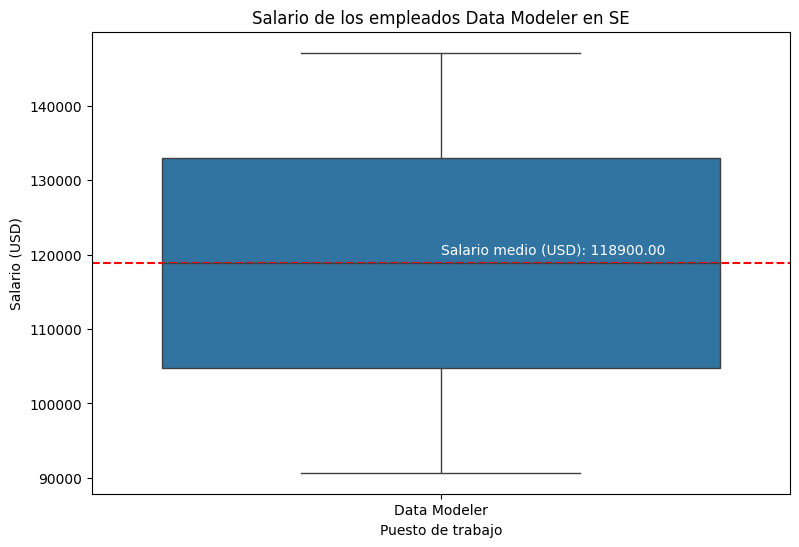

In [36]:
# df_DM_SE =pd.DataFrame(df['salary_in_usd'][(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')])

df_plot =  df[(df['job_title'] == 'Data Modeler') & (df['experience_level'] == 'SE')]

plt.figure(figsize=(9,6))
sns.boxplot(x = 'job_title', y='salary_in_usd', data =df_plot)

#Se añade una line que marque el salario medio
mean_salary = df_plot['salary_in_usd'].mean()
plt.axhline(mean_salary, color = 'red', linestyle= '--')

plt.text(x=0,  # Posición en el eje x (puedes ajustar esto según tu gráfico)
         y=mean_salary + (0.01*mean_salary),  # Posición en el eje y (ligeramente por encima de la línea)
         s=f'Salario medio (USD): {mean_salary:.2f}',  # Texto que mostrará el valor de la media
         color='white')

plt.title('Salario de los empleados Data Modeler en SE')
plt.xlabel('Puesto de trabajo')
plt.ylabel('Salario (USD)')

plt.show()

### Para los ML Engineer, ¿qué diferencia de salario hay entre full time y part time?
 

Aquí, para hacer un análisis un poco más en profundidad, primero se calcula la diferencia de salario que se pide. Luego, se representa un gráfico de estimación de densidad de kernel (KDE). En él se puede apreciar la distribución de los salarios en función del tipo de empleo.

In [37]:
df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean()

,salary_in_usd
employment_type,
CT,108500.0
FT,168083.9
PT,15966.0


In [38]:
salary_FT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['FT']
salary_PT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['PT']

salary_FT-salary_PT, salary_FT/salary_PT

(salary_in_usd    152117.9
 dtype: float64,
 salary_in_usd    10.527615
 dtype: float64)

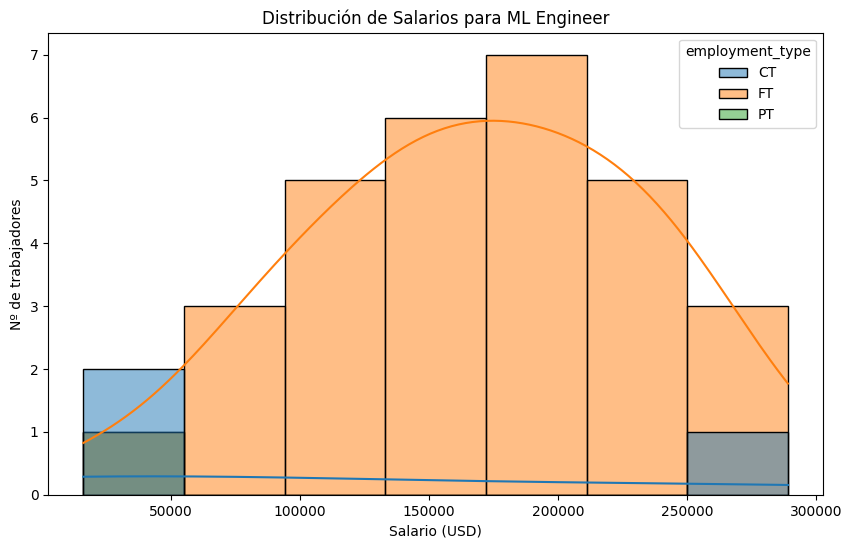

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['job_title'] == 'ML Engineer'], x='salary_in_usd', hue='employment_type', kde=True)
plt.title('Distribución de Salarios para ML Engineer')
plt.xlabel('Salario (USD)')
plt.ylabel('Nº de trabajadores')

plt.show()

### ¿En qué país, en cuanto a localización de la compañía, hay mayor ratio de teletrabajo?

Para esto utilizamos la misma tecnica que antes, pero cambiando el puesto de trabajo con el país.

In [40]:
df[['company_location', 'remote_ratio']].groupby('company_location').agg('mean').sort_values(by='remote_ratio', ascending=False).head(20)

,remote_ratio
company_location,
AR,100.000000
KE,100.000000
MY,100.000000
IL,100.000000
EG,100.000000
CR,100.000000
CF,100.000000
CL,100.000000
PH,100.000000


In [41]:
location_counts = df['company_location'].groupby(df['company_location']).transform('count')

# Filtrar el DataFrame para obtener solo las filas donde 'company_location' tenga al menos 10 instancias
df_job10 = df[location_counts >= 10]


In [42]:
location_counts = df['company_location'].groupby(df['company_location']).transform('count')

# Filtrar el DataFrame para obtener solo las filas donde 'company_location' tenga al menos 10 instancias
df_job10 = df[location_counts >= 10]


#Calculo el porcentaje de trabajo remoto para cada empleo, y el numero de empleados en ese puesto
df_remote = df_job10[['company_location', 'remote_ratio']].groupby('company_location').agg('mean')
df_count = df_job10[['company_location', 'remote_ratio']].groupby('company_location').agg('count').rename(columns={'remote_ratio':'job_count'})
df_join = pd.merge(df_remote, df_count, how='inner', on= 'company_location').sort_values(by='remote_ratio', ascending=False)
df_join.sort_values(by='job_count', ascending=False)

#Aqui calculo, para cada puesto, cuantos trabajan 100% remoto, cuantos 50% y cuantos 0%
df_100= df[['company_location' , 'remote_ratio']][df['remote_ratio'] == 100]
df_50= df[['company_location' , 'remote_ratio']][df['remote_ratio'] == 50]
df_0= df[['company_location' , 'remote_ratio']][df['remote_ratio'] == 0]

df_100 =df_100.groupby('company_location').agg('count').rename(columns={'remote_ratio':'100_remote'})
df_50 =df_50.groupby('company_location').agg('count').rename(columns={'remote_ratio':'50_remote'})
df_0 = df_0.groupby('company_location').agg('count').rename(columns={'remote_ratio':'0_remote'})

df_remote = pd.merge(df_100, df_50, how = 'inner', on='company_location')
df_remote = pd.merge(df_remote, df_0, how = 'inner', on='company_location')

#Por ultimo, saco el porcentaje de trabajadores que tienen 100, 50 y 0% de remoto respectivamente
df_all = pd.merge(df_join, df_remote, how='inner', on='company_location')

df_all['100_remote'] = (df_all['100_remote'] /df_all['job_count'] *100).round(2)
df_all['50_remote'] = (df_all['50_remote'] /df_all['job_count'] *100).round(2)
df_all['0_remote'] = (df_all['0_remote'] /df_all['job_count'] *100).round(2)

df_all.sort_values(by='job_count', ascending=False).head()

#Por ultimo, saco el porcentaje de trabajadores que tienen 100, 50 y 0% de remoto respectivamente
df_all = pd.merge(df_join, df_remote, how='inner', on='company_location')

df_all['100_remote'] = (df_all['100_remote'] /df_all['job_count'] *100).round(2)
df_all['50_remote'] = (df_all['50_remote'] /df_all['job_count'] *100).round(2)
df_all['0_remote'] = (df_all['0_remote'] /df_all['job_count'] *100).round(2)

df_all.sort_values(by='job_count', ascending=False).tail()


,remote_ratio,job_count,100_remote,50_remote,0_remote
company_location,,,,,
FR,63.636364,33,33.33,60.61,6.06
PT,39.285714,14,28.57,21.43,50.00
AU,67.857143,14,50.00,35.71,14.29
NL,57.692308,13,46.15,23.08,30.77
GR,81.818182,11,72.73,18.18,9.09


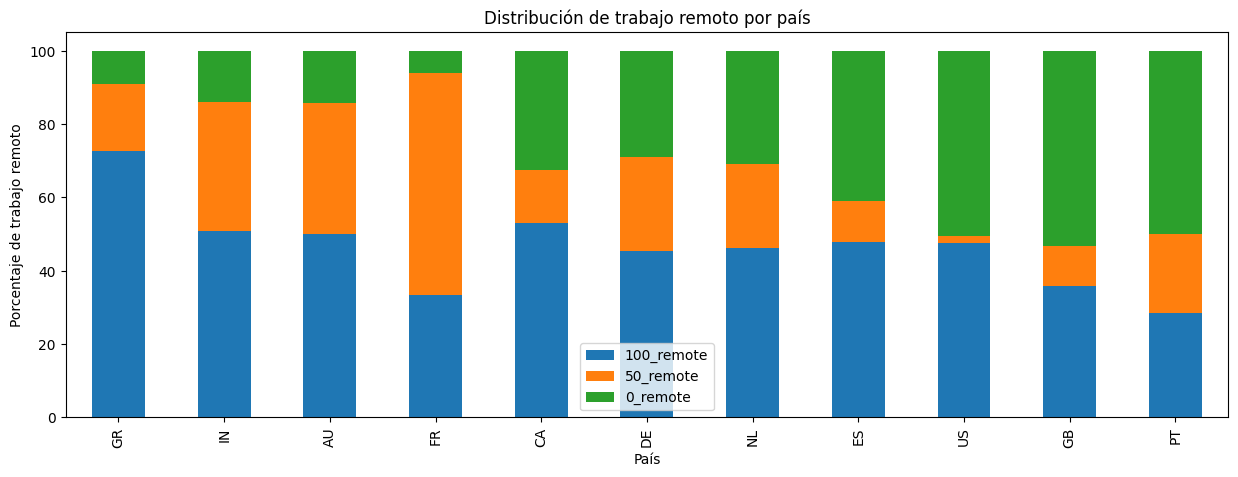

In [43]:

# Crear un gráfico de barras apiladas
df_all[['100_remote', '50_remote', '0_remote']].plot(kind='bar', stacked=True, figsize=(15, 5))

plt.xlabel('País')
plt.ylabel('Porcentaje de trabajo remoto')
plt.title('Distribución de trabajo remoto por país')
plt.show()

In [44]:
#Grafico interactivo

# Crear las trazas para cada categoría (100% remoto, 50% remoto y 0% remoto)
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_all.index,
    y=df_all['100_remote'],
    name='100% remoto',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df_all.index,
    y=df_all['50_remote'],
    name='50% remoto',
    marker_color='orange'
))

fig.add_trace(go.Bar(
    x=df_all.index,
    y=df_all['0_remote'],
    name='0% remoto',
    marker_color='green'
))

# Hacer que las barras estén apiladas
fig.update_layout(barmode='stack')



# Añadir etiquetas y título
fig.update_layout(
    title={
        'text': "Distribución de trabajo remoto por país",
        'x': 0.5,  # Centrar el título
        'xanchor': 'center'  # Anclarlo al centro
    },
    xaxis_title='País',
    yaxis_title='Porcentaje de trabajo remoto',
    xaxis_tickangle=0,  
    height=600,
    width=1000
)

# Mostrar el gráfico
fig.show()